In [2]:
# importing the required libraries
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('mbti.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
data.shape

(8675, 2)

In [5]:
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [6]:
data['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [8]:
data['posts'][1]

"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f9da

In [9]:
#split the dataset for training and testing 

train_data,test_data=train_test_split(data,test_size=0.25,random_state=123,stratify=data.type)

In [10]:
#original text contains many unrequired characters which are needed to be removed
#preprocessing step - tokenization, lemmatization and cleaning of data
#function to clean the text 

def clean_text(data):
  data_length=[]
  lemmatizer=WordNetLemmatizer
  cleaned_text=[]

  for sentence in tqdm(data.posts):
        sentence=sentence.lower()
        
#         removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
#         removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
    
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
  return cleaned_text,data_length

In [11]:
train_data.posts,train_length=clean_text(train_data)

100%|██████████| 6506/6506 [00:06<00:00, 964.44it/s]


In [12]:
test_data.posts,test_length=clean_text(test_data)

100%|██████████| 2169/2169 [00:02<00:00, 820.55it/s]


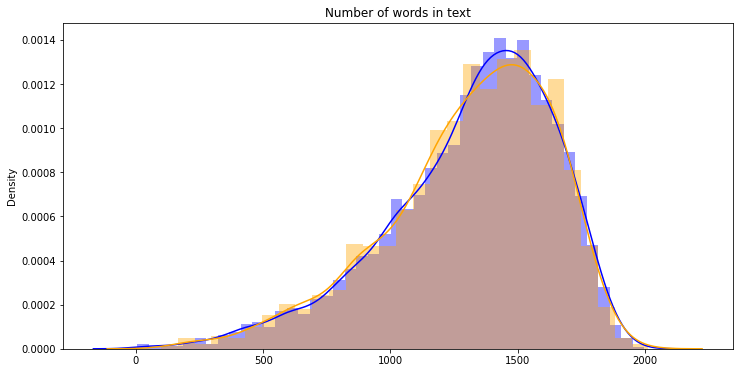

In [13]:
plt.figure(figsize=(12,6))
sns.distplot(train_length,label='train data word length',color='blue')
sns.distplot(test_length,label='test data word length',color='orange')
plt.title('Number of words in text')
plt.show()

In [14]:
px.pie(train_data,names='type',title='Personality type')

Tokenizing Words

In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [16]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [17]:
vectorizer=TfidfVectorizer(max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x7f9c8f020250>)

In [18]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [19]:
print(train_post.shape)
print(test_post.shape)

(6506, 5000)
(2169, 5000)


In [20]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

# Model Selection

In [21]:
models_accuracy={}

##Logistic Regression

In [22]:
model_Log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_Log.fit(train_post,train_target)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [23]:
print('train classification report \n ',classification_report(train_target,model_Log.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target,model_Log.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.81      0.18      0.30       142
        ENFP       0.83      0.66      0.73       506
        ENTJ       0.96      0.25      0.39       173
        ENTP       0.80      0.64      0.71       514
        ESFJ       0.00      0.00      0.00        32
        ESFP       0.00      0.00      0.00        36
        ESTJ       0.00      0.00      0.00        29
        ESTP       1.00      0.06      0.11        67
        INFJ       0.73      0.82      0.78      1102
        INFP       0.65      0.93      0.77      1374
        INTJ       0.72      0.81      0.76       818
        INTP       0.72      0.89      0.79       978
        ISFJ       0.89      0.26      0.40       125
        ISFP       0.88      0.28      0.43       203
        ISTJ       0.82      0.21      0.33       154
        ISTP       0.88      0.53      0.66       253

    accuracy                           0.72      

In [24]:
models_accuracy["Logistic Regression"]=accuracy_score(test_target,model_Log.predict(test_post))

##Support Vector Classifier

In [25]:
model_svc=SVC()
model_svc.fit(train_post,train_target)

SVC()

In [26]:
print('train classification report \n ',classification_report(train_target,model_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.95      0.89      0.92       142
        ENFP       0.97      0.95      0.96       506
        ENTJ       0.98      0.90      0.94       173
        ENTP       0.94      0.96      0.95       514
        ESFJ       1.00      0.62      0.77        32
        ESFP       1.00      0.33      0.50        36
        ESTJ       1.00      0.66      0.79        29
        ESTP       1.00      0.91      0.95        67
        INFJ       0.95      0.97      0.96      1102
        INFP       0.94      0.98      0.96      1374
        INTJ       0.97      0.96      0.96       818
        INTP       0.94      0.98      0.96       978
        ISFJ       1.00      0.92      0.96       125
        ISFP       0.96      0.90      0.93       203
        ISTJ       0.95      0.90      0.92       154
        ISTP       0.98      0.94      0.96       253

    accuracy                           0.95      

In [27]:
models_accuracy["SV Classifier"]=accuracy_score(test_target,model_svc.predict(test_post))

##Multinomial Naive Bayes

In [28]:
model_mnb=MultinomialNB()
model_mnb.fit(train_post,train_target)

MultinomialNB()

In [29]:
print('train classification report \n ',classification_report(train_target,model_mnb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_mnb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       142
        ENFP       0.87      0.03      0.05       506
        ENTJ       0.00      0.00      0.00       173
        ENTP       0.80      0.06      0.12       514
        ESFJ       0.00      0.00      0.00        32
        ESFP       0.00      0.00      0.00        36
        ESTJ       0.00      0.00      0.00        29
        ESTP       0.00      0.00      0.00        67
        INFJ       0.52      0.63      0.57      1102
        INFP       0.35      0.94      0.52      1374
        INTJ       0.83      0.41      0.55       818
        INTP       0.60      0.65      0.63       978
        ISFJ       0.00      0.00      0.00       125
        ISFP       0.00      0.00      0.00       203
        ISTJ       0.00      0.00      0.00       154
        ISTP       0.00      0.00      0.00       253

    accuracy                           0.46      

In [30]:
models_accuracy['Multinomial Naive Bayes']=accuracy_score(test_target,model_mnb.predict(test_post))

##KNN Neighbours

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=16)
model_knn.fit(train_post,train_target)
print('train classification report \n ',classification_report(train_target,model_knn.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_knn.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.63      0.41      0.50       142
        ENFP       0.57      0.60      0.58       506
        ENTJ       0.86      0.25      0.39       173
        ENTP       0.76      0.45      0.57       514
        ESFJ       0.41      0.41      0.41        32
        ESFP       1.00      0.03      0.05        36
        ESTJ       0.64      0.31      0.42        29
        ESTP       0.77      0.34      0.47        67
        INFJ       0.50      0.70      0.58      1102
        INFP       0.42      0.87      0.57      1374
        INTJ       0.75      0.32      0.45       818
        INTP       0.80      0.35      0.49       978
        ISFJ       0.80      0.50      0.62       125
        ISFP       0.79      0.28      0.41       203
        ISTJ       0.71      0.29      0.41       154
        ISTP       0.89      0.23      0.36       253

    accuracy                           0.53      

In [32]:
models_accuracy['KNN Neighbours']=accuracy_score(test_target,model_knn.predict(test_post))

##Random Forest Classifier

In [33]:
model_rfc=RandomForestClassifier(max_depth=10)
model_rfc.fit(train_post,train_target)

RandomForestClassifier(max_depth=10)

In [34]:
print('train classification report \n ',classification_report(train_target,model_rfc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_rfc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.06      0.12       142
        ENFP       0.99      0.43      0.60       506
        ENTJ       1.00      0.03      0.06       173
        ENTP       0.98      0.62      0.76       514
        ESFJ       0.00      0.00      0.00        32
        ESFP       0.00      0.00      0.00        36
        ESTJ       1.00      0.03      0.07        29
        ESTP       1.00      0.03      0.06        67
        INFJ       0.80      0.84      0.82      1102
        INFP       0.48      0.99      0.64      1374
        INTJ       0.91      0.75      0.82       818
        INTP       0.75      0.90      0.82       978
        ISFJ       1.00      0.10      0.19       125
        ISFP       1.00      0.03      0.06       203
        ISTJ       1.00      0.01      0.01       154
        ISTP       1.00      0.21      0.34       253

    accuracy                           0.68      

In [35]:
models_accuracy['Random Forest Classifier']=accuracy_score(test_target,model_rfc.predict(test_post))

##XGBoost Classifier

In [36]:
model_xgb=XGBClassifier(gpu_id=0,tree_method='gpu_hist',max_depth=5,n_estimators=50,learning_rate=0.1)
model_xgb.fit(train_post,train_target)

XGBClassifier(gpu_id=0, max_depth=5, n_estimators=50,
              objective='multi:softprob', tree_method='gpu_hist')

In [37]:
print('train classification report \n ',classification_report(train_target,model_xgb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_xgb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.99      0.96      0.98       142
        ENFP       0.96      0.92      0.94       506
        ENTJ       0.98      0.93      0.96       173
        ENTP       0.94      0.92      0.93       514
        ESFJ       1.00      0.94      0.97        32
        ESFP       1.00      0.94      0.97        36
        ESTJ       1.00      0.97      0.98        29
        ESTP       1.00      1.00      1.00        67
        INFJ       0.92      0.91      0.92      1102
        INFP       0.90      0.95      0.93      1374
        INTJ       0.93      0.93      0.93       818
        INTP       0.93      0.93      0.93       978
        ISFJ       1.00      0.94      0.97       125
        ISFP       0.99      0.94      0.96       203
        ISTJ       0.99      0.95      0.97       154
        ISTP       0.98      0.96      0.97       253

    accuracy                           0.93      

In [38]:
models_accuracy['XGBoost Classifier']=accuracy_score(test_target,model_xgb.predict(test_post))

In [39]:
models_accuracy

{'KNN Neighbours': 0.4541263254956201,
 'Logistic Regression': 0.6173351775011526,
 'Multinomial Naive Bayes': 0.36698939603503916,
 'Random Forest Classifier': 0.4734900875979714,
 'SV Classifier': 0.6330106039649608,
 'XGBoost Classifier': 0.6468418626094975}

In [40]:
accuracy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

In [41]:
accuracy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,XGBoost Classifier,0.646842
1,SV Classifier,0.633011
2,Logistic Regression,0.617335
3,Random Forest Classifier,0.473490
4,KNN Neighbours,0.454126
5,Multinomial Naive Bayes,0.366989


In [42]:
# XGBoost model seems to perform well in predicting values compared to the other models.